In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class AutoEncoder(tf.keras.Model):

    def __init__(self, latent_dim):
        super().__init__()

        self.latent_dim = latent_dim

        # Encoder.
        self.encoder_reshape = layers.Reshape((784,))
        self.encoder_fc1 = layers.Dense(256, activation="relu")
        self.encoder_fc2 = layers.Dense(latent_dim, activation="relu")

        # Decoder.
        self.decoder_fc1 = layers.Dense(256, activation="relu")
        self.decoder_fc2 = layers.Dense(784, activation="sigmoid")
        self.decoder_reshape = layers.Reshape((28, 28, 1))

        self._build_graph()

    def _build_graph(self):
        input_shape = (28, 28, 1)
        self.build((None,) + input_shape)
        inputs = tf.keras.Input(shape=input_shape)
        _ = self.call(inputs)

    def call(self, x):
        z = self.encode(x)
        y = self.decode(z)
        return y

    def encode(self, x):
        x = self.encoder_reshape(x)
        x = self.encoder_fc1(x)
        z = self.encoder_fc2(x)
        return z

    def decode(self, z):
        y = self.decoder_fc1(z)
        y = self.decoder_fc2(y)
        y = self.decoder_reshape(y)
        return y

autoencoder = AutoEncoder(32)
autoencoder.summary()

autoencoder.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy"
)

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 419,120
Trainable params: 419,120
Non-tr

In [ ]:
(mnist_train_original, mnist_validate_original, mnist_test_original), info = tfds.load(
    "mnist",
    split=["train[:80%]", "train[80%:]", "test"],
    with_info=True,
    as_supervised=True
)
info

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [ ]:
def encode(image):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image_encoded, image_encoded

mnist_train = mnist_train_original.map(lambda image, _: encode(image)).cache().shuffle(60000)
mnist_validate = mnist_validate_original.map(lambda image, _: encode(image)).cache()
mnist_test = mnist_test_original.map(lambda image, _: encode(image)).cache()

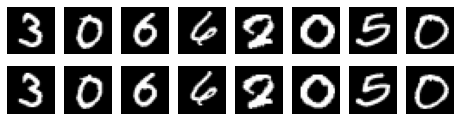

In [ ]:
def render_dataset():
    index = 1
    plt.figure(figsize=(8, 2))
    for image_in, image_out in mnist_train.take(8):
        plt.subplot(2, 8, index)
        plt.axis("off")
        plt.imshow(image_in[:,:,0], cmap="gray")

        plt.subplot(2, 8, index + 8)
        plt.axis("off")
        plt.imshow(image_out[:,:,0], cmap="gray")

        index += 1

render_dataset()

1/1 [==============================] - 0s 34ms/step


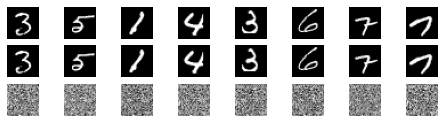

In [ ]:
def render_predictions():
    index = 1
    plt.figure(figsize=(8, 2))
    for image_in, image_out in mnist_train.take(8):
        plt.subplot(3, 8, index)
        plt.axis("off")
        plt.imshow(image_in[:,:,0], cmap="gray")

        plt.subplot(3, 8, index + 8)
        plt.axis("off")
        plt.imshow(image_out[:,:,0], cmap="gray")

        prediction = autoencoder.predict(image_in.numpy().reshape(1, 28, 28, 1))[0]
        plt.subplot(3, 8, index + 16)
        plt.axis("off")
        plt.imshow(prediction[:,:,0], cmap="gray")

        index += 1

render_predictions()

In [ ]:
history = autoencoder.fit(
    mnist_train.batch(256),
    epochs=50,
    validation_data=mnist_validate.batch(256)
)

Epoch 1/50
188/188 [==============================] - 3s 10ms/step - loss: 0.2029 - val_loss: 0.1546
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1421 - val_loss: 0.1318
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1256 - val_loss: 0.1220
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1129
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1108 - val_loss: 0.1096
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1070 - val_loss: 0.1048
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1040 - val_loss: 0.1022
Epoch 8/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1016 - val_loss: 0.1021
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0996 - val_loss: 0.0986
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0981 - val_loss: 0.097

1/1 [==============================] - 0s 15ms/step


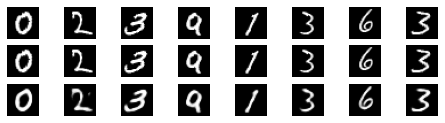

In [ ]:
render_predictions()

In [ ]:
autoencoder = AutoEncoder(32)
autoencoder.summary()

autoencoder.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy"
)

Model: "auto_encoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 dense_6 (Dense)             (None, 256)               8448      
                                                                 
 dense_7 (Dense)             (None, 784)               201488    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 419,120
Trainable params: 419,120
Non-

In [ ]:
def encode(image):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32)
    noise = tf.random.normal(
        shape=image.shape,
        mean=0.5,
        stddev=0.5,
        dtype=tf.float32
    )
    image_noised = tf.clip_by_value(image_encoded + noise, 0.0, 1.0)
    return image_noised, image_encoded

mnist_train = mnist_train_original.map(lambda image, _: encode(image)).cache().shuffle(60000)
mnist_validate = mnist_validate_original.map(lambda image, _: encode(image)).cache()
mnist_test = mnist_test_original.map(lambda image, _: encode(image)).cache()

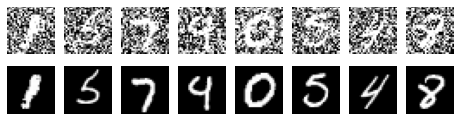

In [ ]:
render_dataset()

In [ ]:
history = autoencoder.fit(
    mnist_train.batch(256),
    epochs=50,
    validation_data=mnist_validate.batch(256)
)

Epoch 1/50
188/188 [==============================] - 2s 10ms/step - loss: 0.2631 - val_loss: 0.2327
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.2208 - val_loss: 0.2152
Epoch 3/50
188/188 [==============================] - 2s 8ms/step - loss: 0.2028 - val_loss: 0.1947
Epoch 4/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1927 - val_loss: 0.1915
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1847 - val_loss: 0.1837
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1782 - val_loss: 0.1761
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1727 - val_loss: 0.1701
Epoch 8/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1678 - val_loss: 0.1664
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1638 - val_loss: 0.1629
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1600 - val_loss: 0.160

1/1 [==============================] - 0s 17ms/step


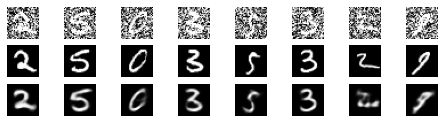

In [ ]:
render_predictions()